<a href="https://colab.research.google.com/github/Rohan2390/AVENDI_PYTORCH/blob/main/chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data


In [ ]:
from torchvision import datasets
path2data = "/content/drive/MyDrive/PYTORCH_AVENDI"
train_data = datasets.MNIST(path2data , train = True , download = True)

In [ ]:
x_train , y_train = train_data.data , train_data.targets

In [ ]:
print(x_train.shape)

print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


In [ ]:
for x,y in train_data:   
   print(x.shape,y.item())    
   break

AttributeError: ignored

In [ ]:
val_data = datasets.MNIST(path2data , train = False , download = True)

In [ ]:
x_val , y_val = val_data.data , val_data.targets

In [ ]:
print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


In [ ]:
x_train = x_train.unsqueeze(1)

In [ ]:
print(x_train.shape)


torch.Size([60000, 1, 28, 28])


In [ ]:

if len(x_train.shape)== 3:
  x_train = x_train.unsqueeze(1)
  
print(x_train.shape)
 

torch.Size([60000, 1, 28, 28])


In [ ]:
if len(x_val.shape)== 3:
  x_val = x_val.unsqueeze(1)
  print(x_val.shape) 

torch.Size([10000, 1, 28, 28])


In [ ]:
from torchvision import utils
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

In [ ]:
def show(img):
  npimg = img.numpy()

  npimg_tr = np.transpose(npimg, (1,2,0))
  plt.imshow(npimg_tr)

torch.Size([3, 152, 242])


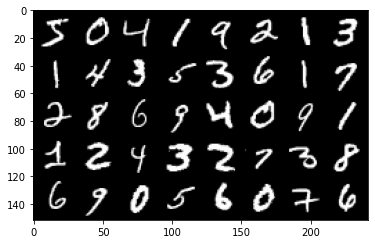

In [ ]:
x_grid=utils.make_grid(x_train[:40], nrow=8, padding=2) 
print(x_grid.shape)
show(x_grid)

# Data transformation



In [ ]:
from torchvision import transforms
train_data = datasets.MNIST(path2data , train = True , download = True)

In [ ]:
data_transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(p=1),
                                    transforms.RandomVerticalFlip(p=1),
                                    transforms.ToTensor(),
])


Text(0.5, 1.0, 'transformed')

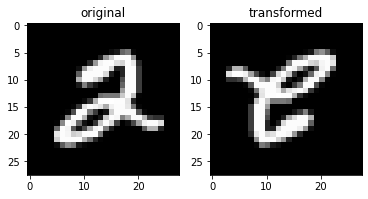

In [ ]:
img = train_data[5][0]
img_tr=data_transform(img)
img_tr_np=img_tr.numpy()
plt.subplot(1,2,1) 
plt.imshow(img,cmap="gray") 
plt.title("original") 
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap="gray"); 
plt.title("transformed")


In [ ]:
train_data=datasets.MNIST(path2data, train=True, download=True, transform=data_transform ) 

In [ ]:
from torch.utils.data import TensorDataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)


In [ ]:
for x,y in train_ds: 
   print(x.shape,y.item()) 
   break

torch.Size([1, 28, 28]) 5


# Creating Data loader

In [ ]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds,batch_size = 8,shuffle = "True")
val_dl = DataLoader(val_ds,batch_size = 8)


In [ ]:
for xb,yb in train_dl:
 print(xb.shape)
 print(yb.shape)
 break

torch.Size([8, 1, 28, 28])
torch.Size([8])


# BUILDING MODELS

In [ ]:
import torch
from torch import nn

input_tensor = torch.randn(64 , 1000)
linear_layer = nn.Linear(1000, 100)
output = linear_layer(input_tensor)

In [ ]:
output.size()

torch.Size([64, 100])

In [ ]:
model = nn.Sequential(
 nn.Linear(4, 5),
 nn.Sigmoid(),
 nn.Linear(5, 1),
)
print(model)


Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
# import torch.nn.functional as F
# class Net(nn.Module):
#  def __init__(self):
#   super(Net, self).__init__()
#  def forward(self, x):
#   pass

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
  
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.fc2 = nn.Linear(500, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)


In [ ]:
# def forward(self, x):
#  x = F.relu(self.conv1(x))
#  x = F.max_pool2d(x, 2, 2)
#  x = F.relu(self.conv2(x))
#  x = F.max_pool2d(x, 2, 2)
#  x = x.view(-1, 4*4*50)
#  x = F.relu(self.fc1(x))
#  x = self.fc2(x)
#  return F.log_softmax(x, dim=1)


In [ ]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
pip install torchsummary


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


# Loss functions

In [ ]:
from torch import nn
loss_function = nn.NLLLoss(reduction = "sum")

In [ ]:
xb= xb.type(torch.float)

In [ ]:
for xb , yb in train_dl :
  xb= xb.type(torch.float)
  out = model(xb)
  loss = loss_function(out, yb)
  print(loss.item())
  break

46.01802444458008


In [ ]:
loss.backward()

In [ ]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)
 # update model parameters
opt.step()

opt.zero_grad()


#TRAINING AND EVALUATION

In [ ]:

def loss_batch(loss_func, xb, yb, yb_h, opt=None):
 # obtain loss
 loss = loss_func(yb_h, yb)
 # obtain performance metric
 metric_b = metrics_batch(yb,yb_h)
 if opt is not None:
  loss.backward()
  opt.step()
  opt.zero_grad()
 return loss.item(), metric_b


In [ ]:
def metrics_batch(target, output):
 # obtain output class
 pred = output.argmax(dim=1, keepdim=True)
 # compare output class with target class
 corrects=pred.eq(target.view_as(pred)).sum().item()
 return corrects


In [ ]:
device = 'cpu'

In [ ]:
def loss_epoch(model,loss_func,dataset_dl,opt=None):
  loss=0.0
  metric=0.0
  len_data=len(dataset_dl.dataset)
  for xb, yb in dataset_dl:
      xb=xb.type(torch.float).to(device)
      yb=yb.to(device)
      # obtain model output
      yb_h=model(xb)
      
      loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
      loss+=loss_b
      if metric_b is not None:
          metric+=metric_b
  loss/=len_data
  metric/=len_data
  return loss, metric

In [ ]:
def train_val(epochs, model, loss_function, opt, train_dl, val_dl):
  for epoch in range (epochs):
    model.train()
    train_loss, train_metric=loss_epoch(model,loss_function,train_dl,opt)
    model.eval()
    with torch.no_grad():
       val_loss, val_metric=loss_epoch(model,loss_function,val_dl)
    accuracy=100*val_metric
    print("epoch: %d, train loss: %.6f, val loss: %.6f,accuracy: %.2f" %(epoch, train_loss,val_loss,accuracy))


In [ ]:
epochs = 5
train_val(epochs, model, loss_function, opt, train_dl, val_dl)

epoch: 0, train loss: 0.055442, val loss: 0.050232,accuracy: 98.21
epoch: 1, train loss: 0.030765, val loss: 0.048046,accuracy: 98.52
epoch: 2, train loss: 0.019199, val loss: 0.055353,accuracy: 98.54
epoch: 3, train loss: 0.013951, val loss: 0.044089,accuracy: 98.84
epoch: 4, train loss: 0.011193, val loss: 0.063609,accuracy: 98.53
